Shortest path from 1 to 11: [1, 2, 3, 5, 6, 10, 11]
Junction nodes along the path: [2, 5, 6, 10]


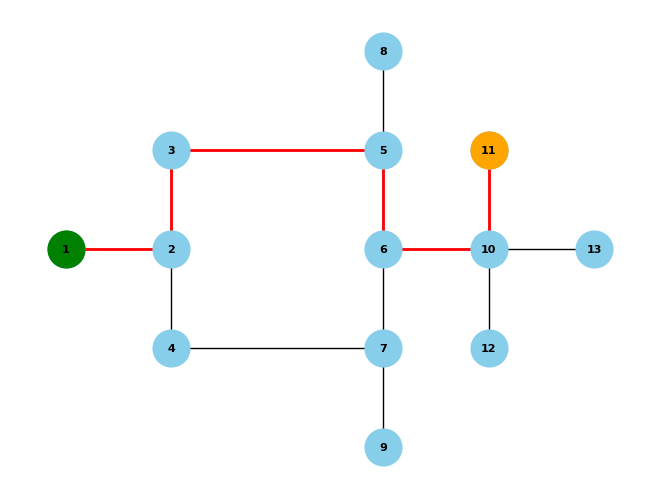

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def draw_graph(edges, pos, highlight_path=None, start_node=None, end_node=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)
        
    plt.show()

def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))
        
        if len(neighbors) > 2:
            junction_nodes.append(current_node)

    return junction_nodes


edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),  # position of node 1
    2: (1, 0),  # position of node 2
    3: (1, 1),  # position of node 3
    4: (1, -1),  # position of node 4
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4,1),
    10: (4,0),
    12:(4,-1),
    13: (5, 0)
    }

start_node = 1
end_node = 11

G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    print("Junction nodes along the path:", junction_nodes)
    draw_graph(edges,pos, highlight_path=path, start_node=start_node, end_node=end_node)
    
else:
    print(f"No path found from {start_node} to {end_node}")


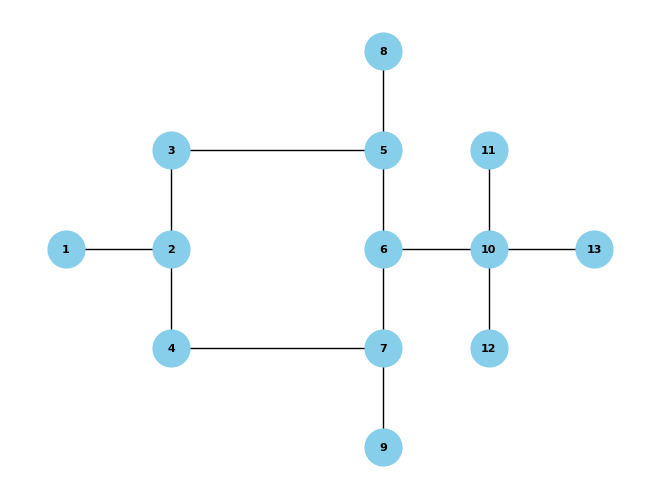

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1,2), 
    (2,3), (2,4),
    (8,5), (5,3), (5,6), (6,7), (7,4), (7,9),
    (11, 10), (10, 6), (10, 12), 
    (10, 13)
]

G = nx.Graph()
G.add_edges_from(edges)

# Specify node positions manually
pos = {
    1: (0, 0),  # position of node 1
    2: (1, 0),  # position of node 2
    3: (1, 1),  # position of node 3
    4: (1, -1),  # position of node 4
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4,1),
    10: (4,0),
    12:(4,-1),
    13: (5, 0)
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()


Shortest path from 1 to 8: [1, 2, 3, 5, 8]
Junction nodes along the path: [2, 5]
From 1 to 2: forward
From 2 to 3: left
From 3 to 5: forward
From 5 to 8: left


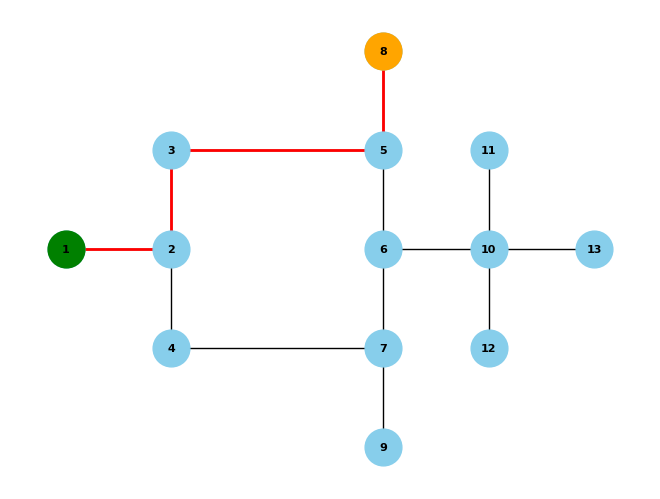

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def draw_graph(edges, pos, highlight_path=None, start_node=None, end_node=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)
        
    plt.show()

def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))
        
        if len(neighbors) > 2:
            junction_nodes.append(current_node)

    return junction_nodes

def get_relative_position(pos_dict, current_node, next_node):
    x_diff = pos_dict[next_node][0] - pos_dict[current_node][0]
    y_diff = pos_dict[next_node][1] - pos_dict[current_node][1]

    if x_diff >= 1 and y_diff ==0:
        return "forward"
    elif x_diff == 0 and y_diff >= 1:
        return "left"
    elif x_diff == 0 and y_diff <= -1:
        return "right"
    elif x_diff <= -1 and y_diff == 0:
        return "backward"
    else:
        return "unknown"

edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),
    2: (1, 0),
    3: (1, 1),
    4: (1, -1),
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4, 1),
    10: (4, 0),
    12: (4, -1),
    13: (5, 0)
}

start_node = 1
end_node = 8

G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    print("Junction nodes along the path:", junction_nodes)

    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        relative_position = get_relative_position(pos, current_node, next_node)
        print(f"From {current_node} to {next_node}: {relative_position}")

    draw_graph(edges, pos, highlight_path=path, start_node=start_node, end_node=end_node)

else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from 1 to 13: [1, 2, 3, 5, 6, 10, 13]
Junction nodes along the path: [2, 5, 6, 10]
From 2 to 3: left
From 5 to 6: right
From 6 to 10: forward
From 10 to 13: forward


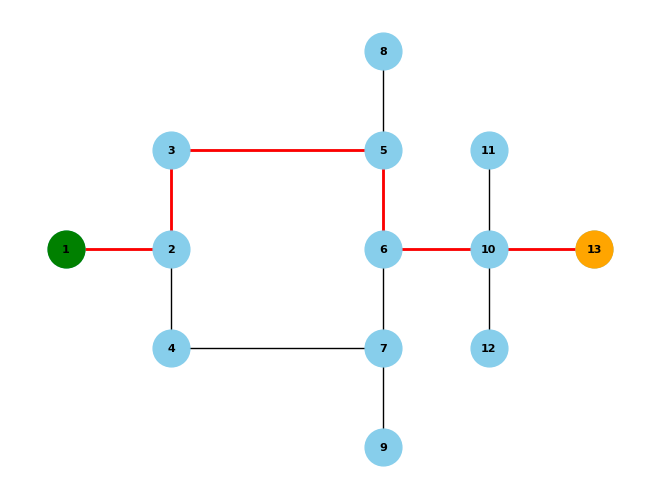

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def draw_graph(edges, pos, highlight_path=None, start_node=None, end_node=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)
        
    plt.show()

def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))
        
        if len(neighbors) > 2:
            junction_nodes.append(current_node)

    return junction_nodes

def get_relative_position(pos_dict, current_node, next_node):
    x_diff = pos_dict[next_node][0] - pos_dict[current_node][0]
    y_diff = pos_dict[next_node][1] - pos_dict[current_node][1]

    if x_diff >= 1 and y_diff == 0:
        return "forward"
    elif x_diff == 0 and y_diff >= 1:
        return "left"
    elif x_diff == 0 and y_diff <= -1:
        return "right"
    elif x_diff <= -1 and y_diff == 0:
        return "backward"
    else:
        return "unknown"

edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),
    2: (1, 0),
    3: (1, 1),
    4: (1, -1),
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4, 1),
    10: (4, 0),
    12: (4, -1),
    13: (5, 0)
}

start_node = 1
end_node = 13

G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    
    if junction_nodes:
        print("Junction nodes along the path:", junction_nodes)
        
        for i in range(len(path) - 1):
            current_node = path[i]
            next_node = path[i + 1]
            
            if current_node in junction_nodes:
                relative_position = get_relative_position(pos, current_node, next_node)
                print(f"From {current_node} to {next_node}: {relative_position}")

        draw_graph(edges, pos, highlight_path=path, start_node=start_node, end_node=end_node)
    else:
        print("No junction nodes along the path.")

else:
    print(f"No path found from {start_node} to {end_node}")


reverse---> True
Shortest path from 12 to 1: [12, 10, 6, 5, 3, 2, 1]
Junction nodes along the path: [10, 6, 5, 2]
From 12 to 10: right
From 10 to 6: backward
From 6 to 5: right
From 5 to 3: backward
From 3 to 2: left
From 2 to 1: backward


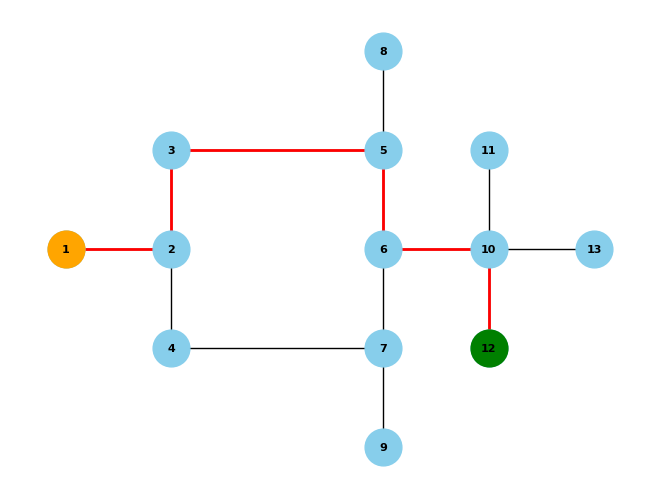

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def draw_graph(edges, pos, highlight_path=None, start_node=None, end_node=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)
        
    plt.show()

def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))
        
        if len(neighbors) > 2:
            junction_nodes.append(current_node)

    return junction_nodes

def get_relative_position(pos_dict, current_node, next_node, reverse=False):
    x_diff = pos_dict[next_node][0] - pos_dict[current_node][0]
    y_diff = pos_dict[next_node][1] - pos_dict[current_node][1]

    if reverse:
        # Reverse left and right
        if x_diff >= 1 and y_diff == 0:
            return "forward"
        elif x_diff == 0 and y_diff >= 1:
            return "right"
        elif x_diff == 0 and y_diff <= -1:
            return "left"
        elif x_diff <= -1 and y_diff == 0:
            return "backward"
        else:
            return "unknown"
    else:
        # Keep the original directions
        if x_diff >= 1 and y_diff == 0:
            return "forward"
        elif x_diff == 0 and y_diff >= 1:
            return "left"
        elif x_diff == 0 and y_diff <= -1:
            return "right"
        elif x_diff <= -1 and y_diff == 0:
            return "backward"
        else:
            return "unknown"

edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),
    2: (1, 0),
    3: (1, 1),
    4: (1, -1),
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4, 1),
    10: (4, 0),
    12: (4, -1),
    13: (5, 0)
}

start_node = 12
end_node = 1

if(start_node>end_node):
    reverse=True
else:
    reverse=False

print("reverse--->", reverse)
    
G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    
    if junction_nodes:
        print("Junction nodes along the path:", junction_nodes)
        
        for i in range(len(path) - 1):
            current_node = path[i]
            next_node = path[i + 1]
            
            relative_position = get_relative_position(pos, current_node, next_node, reverse)
            print(f"From {current_node} to {next_node}: {relative_position}")

        draw_graph(edges, pos, highlight_path=path, start_node=start_node, end_node=end_node)
    else:
        print("No junction nodes along the path.")

else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from 12 to 1: [12, 10, 6, 5, 3, 2, 1]
From 12 to 10: (12, ' up')
From 10 to 6: (10, 'left')
From 6 to 5: (6, ' up')
From 5 to 3: (5, 'left')
From 3 to 2: (3, ' down')
From 2 to 1: (2, 'left')


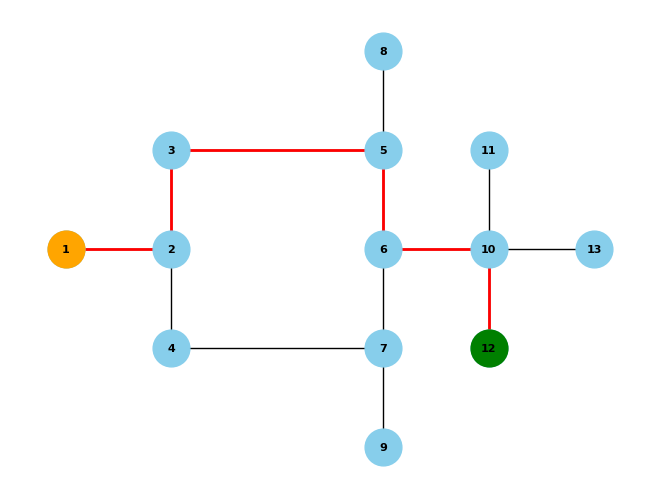

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def draw_graph(edges, pos, highlight_path=None, start_node=None, end_node=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)
        
    plt.show()

def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))
        
        if len(neighbors) > 2:
            junction_nodes.append(current_node)

    return junction_nodes

def get_directions(path, pos):
    directions = []
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        current_pos = pos[current_node]
        next_pos = pos[next_node]
        direction = ""
        if current_pos[0] < next_pos[0]:
            direction += "right"
        elif current_pos[0] > next_pos[0]:
            direction += "left"
        if current_pos[1] < next_pos[1]:
            direction += " up"
        elif current_pos[1] > next_pos[1]:
            direction += " down"
        directions.append((current_node, direction))
    return directions

edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),
    2: (1, 0),
    3: (1, 1),
    4: (1, -1),
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4, 1),
    10: (4, 0),
    12: (4, -1),
    13: (5, 0)
}

start_node = 12
end_node = 1

G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    directions = get_directions(path, pos)
    

    for (i, direction) in zip(range(len(path) - 1), directions):
        current_node = path[i]
        next_node = path[i + 1]
        print(f"From {current_node} to {next_node}: {direction}")

    draw_graph(edges, pos, highlight_path=path, start_node=start_node, end_node=end_node)

else:
    print(f"No path found from {start_node} to {end_node}")


In [ ]:
Shortest path: [12, 10, 6, 5, 3, 2, 1]
Directions:
Node 12:  up
Node 10: left
Node 6:  up
Node 5: left
Node 3:  down
Node 2: left

In [10]:
import heapq

def dijkstra(edges, start, end):
    graph = {}
    for edge in edges:
        a, b = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)

    pq = [(0, start, [])]
    visited = set()

    while pq:
        (cost, node, path) = heapq.heappop(pq)
        if node not in visited:
            visited.add(node)
            path = path + [node]
            if node == end:
                return path
            for neighbor in graph[node]:
                heapq.heappush(pq, (cost + 1, neighbor, path))

    return []

def get_directions(path, pos):
    directions = []
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        current_pos = pos[current_node]
        next_pos = pos[next_node]
        direction = ""
        if current_pos[0] < next_pos[0]:
            direction += "right"
        elif current_pos[0] > next_pos[0]:
            direction += "left"
        if current_pos[1] < next_pos[1]:
            direction += " up"
        elif current_pos[1] > next_pos[1]:
            direction += " down"
        directions.append((current_node, direction))
    return directions

edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),
    2: (1, 0),
    3: (1, 1),
    4: (1, -1),
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4, 1),
    10: (4, 0),
    12: (4, -1),
    13: (5, 0)
}

start_node = 12
end_node = 1

shortest_path = dijkstra(edges, start_node, end_node)
directions = get_directions(shortest_path, pos)

print("Shortest path:", shortest_path)
print("Directions:")
for node, direction in directions:
    print(f"Node {node}: {direction}")


Shortest path: [12, 10, 6, 5, 3, 2, 1]
Directions:
Node 12:  up
Node 10: left
Node 6:  up
Node 5: left
Node 3:  down
Node 2: left


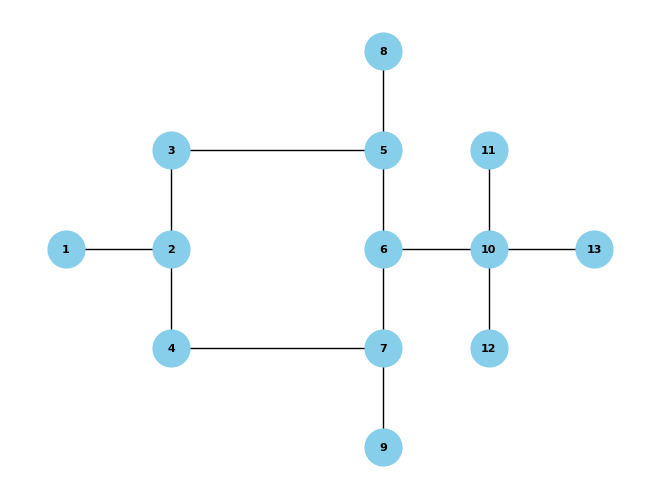

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1,2), 
    (2,3), (2,4),
    (8,5), (5,3), (5,6), (6,7), (7,4), (7,9),
    (11, 10), (10, 6), (10, 12), 
    (10, 13)
]

G = nx.Graph()
G.add_edges_from(edges)

# Specify node positions manually
pos = {
    1: (0, 0),  # position of node 1
    2: (1, 0),  # position of node 2
    3: (1, 1),  # position of node 3
    4: (1, -1),  # position of node 4
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4,1),
    10: (4,0),
    12:(4,-1),
    13: (5, 0)
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()
